# Example generated from http://varianceexplained.org/r/kmeans-free-lunch

**Este ejemplo está focalizado en subrayar el denominado como  "No Free Lunch Theorem": http://ti.arc.nasa.gov/m/profile/dhw/papers/78.pdf
**

**“When averaged across all possible situations, every algorithm performs equally well.”**

Para tratar de tener una idea sobre las implicaciones de dicho teorema, ejecutaremos el código que figura a continuación varias veces. 

En primer lugar importamos las bibliotecas que necesitaremos en esta práctica

In [1]:
import random 
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np

Generamos dos poblaciones gausianas con distribuciones concéntricas. 

In [2]:
x = []
y = []
x1 = []
y1 = []
for i in range(1,551):
    aux = random.gauss(0,1)
    x.append(aux)
    aux = random.gauss(0,1)
    y.append(aux)
    #para la segunda población hacemos que las muestras se distribuyan
    #en el entorno de la circunferencia de radio 5 (de acuerdo con una distribucion gausiana)
    r = random.gauss(5,0.25)
    #Los puntos aleatorios son generados de acuerdo con una representación polar 
    #p=(r*cos(angulo),r*sin(angulo)). r se escoge a partir de una distribución gausiana de media 
    #5 y varianza 0.25. El ángulo, por su parte, se genera aleatoriamente según un distribución
    #uniforme en [0,2pi]
    theta = random.uniform(0,2*math.pi)
    x1.append(r*math.cos(theta))
    y1.append(r*math.sin(theta))
    

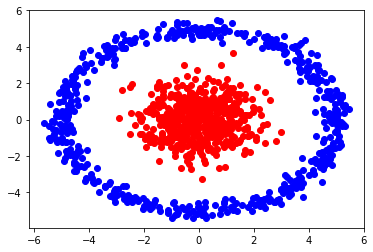

In [3]:
plt.plot(x,y,'ro')
plt.plot(x1,y1,'bo')
plt.show()

Vamos a intentar identificar las dos clases que tenemos empleando kmeans. Para ello, importamos las bibliotecas necesarias e inicializamos la clase Kmeans de scikitlearn. Como podéis comprobar, hemos escogido k=2 y el proceso de inicialización de centroides se hará de modo aleatorio. 

In [4]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [5]:
km = KMeans(n_clusters=2,init='random',n_init=1,verbose=1)

A continuación convertimos a array el par de listas con las que hemos trabajado hasta este punto. 

In [6]:
x = np.array(x)

In [7]:
y = np.array(y)

In [8]:
data = np.vstack((x,y)).T
data

array([[ 0.37248108,  0.42275093],
       [-1.39232462, -1.06874167],
       [-0.64984709, -1.32727708],
       ...,
       [-0.01700426,  0.85424854],
       [ 0.69585358, -1.10077147],
       [-0.84680631, -0.64606692]])

In [9]:
x1 = np.array(x1)
y1 = np.array(y1)
data1 = np.vstack((x1,y1)).T
data1 = np.concatenate((data,data1))

In [10]:
data1.shape

(1100, 2)

In [11]:
x.shape

(550,)

Representamos la columna 1 respecto a la 0.

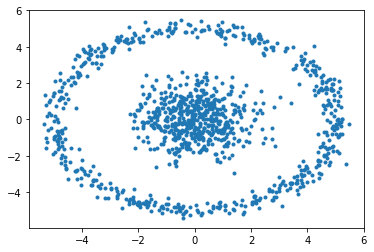

In [12]:
plt.plot(data1[:,0],data1[:,1],'.')
plt.show()

In [13]:
km.fit(data1)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 10457.5070391
start iteration
done sorting
end inner loop
Iteration 1, inertia 10440.2187955
start iteration
done sorting
end inner loop
Iteration 2, inertia 10423.5197861
start iteration
done sorting
end inner loop
Iteration 3, inertia 10408.9692133
start iteration
done sorting
end inner loop
Iteration 4, inertia 10399.1298457
start iteration
done sorting
end inner loop
Iteration 5, inertia 10392.6304531
start iteration
done sorting
end inner loop
Iteration 6, inertia 10390.2164358
start iteration
done sorting
end inner loop
Iteration 7, inertia 10388.4646083
start iteration
done sorting
end inner loop
Iteration 8, inertia 10387.3087742
start iteration
done sorting
end inner loop
Iteration 9, inertia 10386.5921329
start iteration
done sorting
end inner loop
Iteration 10, inertia 10385.8223447
start iteration
done sorting
end inner loop
Iteration 11, inertia 10383.7003404
start iteration
done sorti

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [14]:
km.cluster_centers_

array([[ 2.64865692, -1.26905426],
       [-1.23411478,  0.59317942]])

In [15]:
km.labels_

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

In [16]:
km.labels_.shape

(1100,)

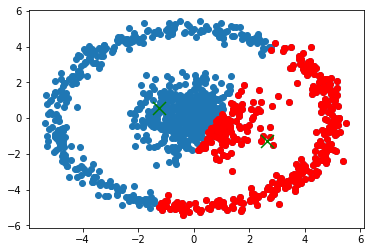

In [17]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',s=169,linewidths=3,color='g',zorder=10)
plt.scatter(data1[:,0],data1[:,1])
unique_labels = set(km.labels_)
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))
xy = data1[km.labels_==0]
plt.scatter(xy[:,0],xy[:,1],color='r')
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
single_link = AgglomerativeClustering(linkage='ward',n_clusters=2)

In [20]:
h_clusters = single_link.fit(data1)

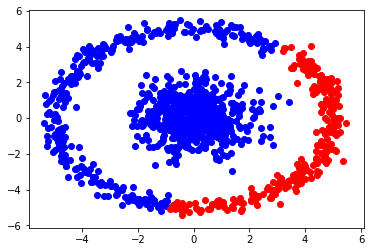

In [21]:
plt.scatter(data1[h_clusters.labels_==0,0],data1[h_clusters.labels_==0,1],color='blue')
plt.scatter(data1[h_clusters.labels_==1,0],data1[h_clusters.labels_==1,1],color='red')

In [22]:
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(data1, n_neighbors=30, include_self=False)

In [23]:
single_link2 = AgglomerativeClustering(linkage="ward",n_clusters=2,connectivity=connectivity)

In [24]:
h_clusters2 = single_link2.fit(data1)

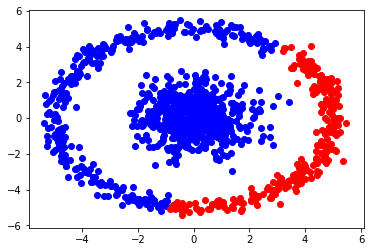

In [25]:
plt.scatter(data1[h_clusters2.labels_==0,0],data1[h_clusters2.labels_==0,1],color='blue')
plt.scatter(data1[h_clusters2.labels_==1,0],data1[h_clusters2.labels_==1,1],color='red')

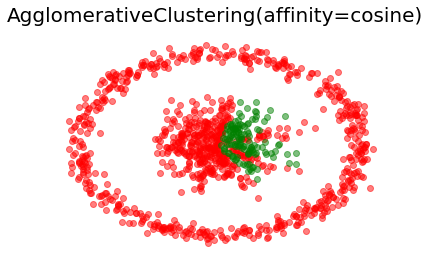

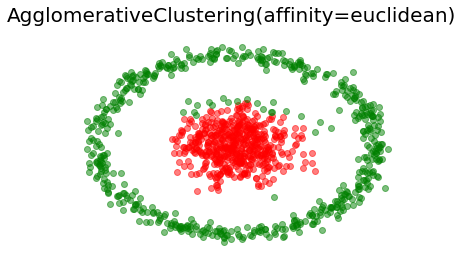

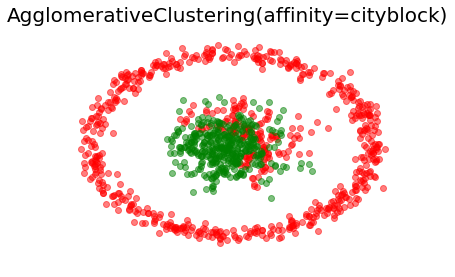

In [26]:
connectivity = kneighbors_graph(data1, n_neighbors=10, include_self=False)

for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(n_clusters=2,
                                    linkage="complete", affinity=metric,connectivity=connectivity)
    model.fit(data1)
    plt.figure()
    
    for l, c in zip(np.arange(model.n_clusters), 'rg'):
        plt.scatter(data1[model.labels_ == l,0],data1[model.labels_ == l,1], c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)


# Vamos a probar otra manera de análisis. Para ello, vamos a expresar los puntos con notación polar. 

In [27]:
r = np.sqrt(data1[:,0]**2+data1[:,1]**2)

In [28]:
theta = np.arctan(data1[:,1]/data1[:,0])

In [29]:
data2 = np.column_stack((r,theta))

In [30]:
data2.shape

(1100, 2)

In [31]:
km.fit(data2)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1189.95009172
start iteration
done sorting
end inner loop
Iteration 1, inertia 1184.38499735
center shift 1.229784e-02 within tolerance 2.242965e-04


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

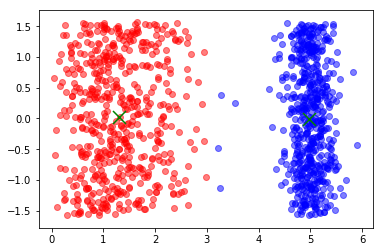

In [32]:
plt.scatter(data2[km.labels_==0,0],data2[km.labels_==0,1],color='r',alpha=0.5)
plt.scatter(data2[km.labels_==1,0],data2[km.labels_==1,1],color='b',alpha=0.5)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',s=169,linewidths=3,color='g',zorder=10)


# Otro problema de kmeans viene derivado de la existencia de poblaciones con tamaños muy distinto. En el ejemplo tenemos poblaciones con distinto tamaño.

In [19]:
sizes = np.array([10,100,1000])


** Arriba hemos definido el tamaño de las tres poblaciones. A continuación se definen la media de cada población en cada uno de los ejes. **

In [20]:
avgs_x = np.array([1,4,10])
avgs_y = np.array([5,0,10])

In [21]:
import time

seed = time.time()
data3 = np.zeros(1);

for a_x,a_y,s in zip(avgs_x,avgs_y,sizes):
    cx = []
    cy = []
    for  i in range(s):
        cx.append(random.gauss(a_x,1))
        cy.append(random.gauss(a_y,1))
    cx = np.array(cx)
    cy = np.array(cy)
    aux = np.vstack((cx,cy)).T
    
    if data3.shape[0] == 1:
        data3 = aux
    else:
        data3 = np.concatenate((data3,aux))
        
data3.shape

(1110, 2)

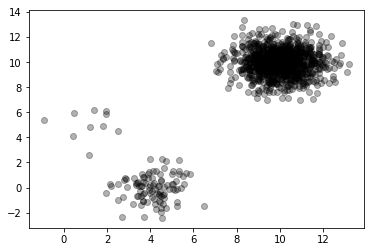

In [36]:
plt.plot(data3[:,0],data3[:,1],'ko',alpha=0.3)

In [37]:
km = KMeans(n_clusters=3,init='random',n_init=1,verbose=1)

In [38]:
km.fit(data3)
km.cluster_centers_.shape

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2569.48933234
start iteration
done sorting
end inner loop
Iteration 1, inertia 2505.58893108
start iteration
done sorting
end inner loop
Iteration 2, inertia 2444.1025414
start iteration
done sorting
end inner loop
Iteration 3, inertia 2410.32687303
start iteration
done sorting
end inner loop
Iteration 4, inertia 2359.84350733
start iteration
done sorting
end inner loop
Iteration 5, inertia 2325.2915782
start iteration
done sorting
end inner loop
Iteration 6, inertia 2325.2915782
center shift 0.000000e+00 within tolerance 6.944588e-04


(3, 2)

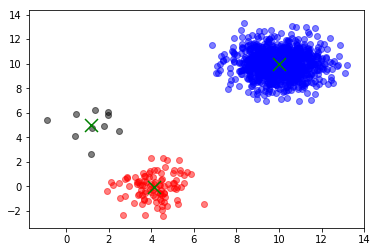

In [39]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',s=169,linewidths=3,color='g',zorder=10)
plt.scatter(data3[km.labels_==0,0],data3[km.labels_==0,1],color='r',alpha=0.5)
plt.scatter(data3[km.labels_==1,0],data3[km.labels_==1,1],color='b',alpha=0.5)
plt.scatter(data3[km.labels_==2,0],data3[km.labels_==2,1],color='k',alpha=0.5)
plt.show()

En muchos casos la población con más muestras tiene asociadas dos clases, mientras que las otras dos clases son fusionadas en un único cluster.

# Vamos a usar GMM para ver si somos capaces de solucionar algunos de los problemas que hemos destacado

In [27]:
from sklearn import mixture
import itertools
from scipy import linalg
import matplotlib as mpl

In [31]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(data1)
        bic.append(gmm.bic(data1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Wi

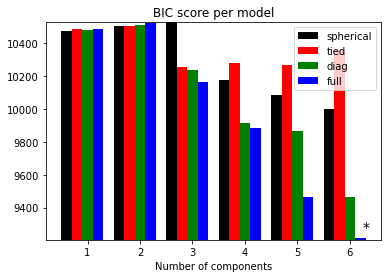

In [29]:
bic = np.array(bic)
color_iter = itertools.cycle(['k', 'r', 'g', 'b', 'c', 'm', 'y'])
clf = best_gmm
bars = []

# Plot the BIC scores

for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)


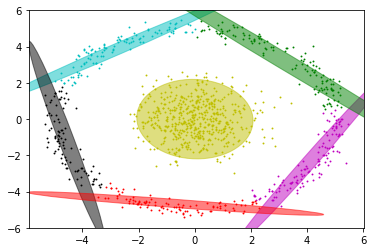

In [43]:
# Plot the winner
splot = plt.subplot(1, 1, 1)
Y_ = clf.predict(data1)
for i, (mean, covar, color) in enumerate(zip(clf.means_, clf.covariances_,
                                             color_iter)):
    #we are computing the eigenvalues of the covariance matrix: v is the sector of eigenvectors; 
    #w is the set of eigenvalues
    v, w = linalg.eigh(covar)
    
    if not np.any(Y_ == i):
        continue
    plt.scatter(data1[Y_ == i, 0], data1[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180 * angle / np.pi  # convert to degrees
    v *= 4
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

## Ejercicio 2
# Repetir el conjunto de pruebas anterior  y comentar los resultados obtenidos. Habrá que entregar un notebook a modo de informe. En el informe se explicarán:

**1.-** La diferencia en los resultados al aplicar k-means con una inicialización aleatoria frente a una inicialización basada en kmeans++·

**2.-** Las limitaciones al aplicar k-means a los datasets considerados.

**3.-** Aplicación a los datasets de las técnicas de clustering jerárquico utilizadas en este ejemplo. Comparar los resultados con los obtenidos para kmeans.

**4.-** Resultados obtenidos al aplicar GMM a los datasets considerados.

**5.-** Aplicar DBSCAN a los datasets considerados y comentar los resultados obtenidos. 


## Apartado 1

### Generando los datos

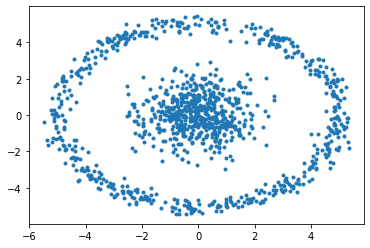

In [10]:
from sklearn import metrics
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2,init='k-means++',n_init=1,verbose=1)

# Generación de poblaciones Gaussianas
x = []
y = []
x1 = []
y1 = []
for i in range(1,551):
    aux = random.gauss(0,1)
    x.append(aux)
    aux = random.gauss(0,1)
    y.append(aux)
    r = random.gauss(5,0.25)
    theta = random.uniform(0,2*math.pi)
    x1.append(r*math.cos(theta))
    y1.append(r*math.sin(theta))
    
#Pasamos las listas a arrays
x = np.array(x)
y = np.array(y)

#Representando los datos sin clasificar
data = np.vstack((x,y)).T
x1 = np.array(x1)
y1 = np.array(y1)
data1 = np.vstack((x1,y1)).T
data1 = np.concatenate((data,data1))
plt.plot(data1[:,0],data1[:,1],'.')
plt.show()

### Aplicación del método K-Means sobre estos

In [13]:
#Compute k-means clustering
km.fit(data1)

Initialization complete
Iteration 0, inertia 11830.73129415113
Iteration 1, inertia 10767.213911222518
Iteration 2, inertia 10646.118138256801
Iteration 3, inertia 10557.556809432102
Iteration 4, inertia 10476.82383033952
Iteration 5, inertia 10401.449241534852
Iteration 6, inertia 10326.458510270999
Iteration 7, inertia 10278.07596881473
Iteration 8, inertia 10248.182328569466
Iteration 9, inertia 10239.509494683203
Iteration 10, inertia 10236.390734351005
Iteration 11, inertia 10234.277123678457
Iteration 12, inertia 10231.90947041071
Iteration 13, inertia 10231.081244233552
Iteration 14, inertia 10229.981384981615
Converged at iteration 14: center shift 0.00019859654517359306 within tolerance 0.0006780755388476328.


KMeans(n_clusters=2, n_init=1, verbose=1)

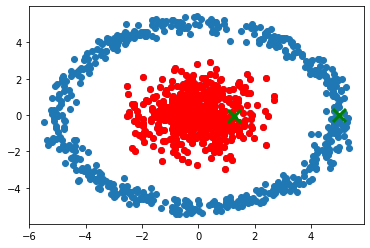

In [22]:
#Representando los datos clasificados
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',s=169,linewidths=3,color='g',zorder=10)
plt.scatter(data1[:,0],data1[:,1])
unique_labels = set(km.labels_)
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))
xy = data1[km.labels_==0]
plt.scatter(xy[:,0],xy[:,1],color='r')
plt.show()

### Pasemos los anteriores datos de cartsianas a polares

In [15]:
#Vamos a repetir los resultados del modelo K-Means pero pasando los datos a polares
#Cambio de variables de cartesianas a polares
r = np.sqrt(data1[:,0]**2+data1[:,1]**2)
theta = np.arctan(data1[:,1]/data1[:,0])

### Aplicación del método K-Means sobre estos

In [39]:
#Compute K-means clustering
data2 = np.column_stack((r,theta))
km.fit(data2)

Initialization complete
Iteration 0, inertia 2175.3637836565867
Iteration 1, inertia 1222.4912613082934
Converged at iteration 1: center shift 0.00020468233767304185 within tolerance 0.00022832278214619952.


array([[ 0.79590219, -0.49019902],
       [ 1.22898438, -0.05915061],
       [ 0.29317298,  0.1640491 ],
       ...,
       [ 4.71408471, -0.85549368],
       [ 4.83135251, -0.92744146],
       [ 5.14536786,  0.73167866]])

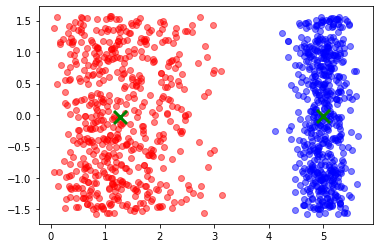

In [18]:
#Representamos los datos tras aplicar K-means
plt.scatter(data2[km.labels_==0,0],data2[km.labels_==0,1],color='r',alpha=0.5)
plt.scatter(data2[km.labels_==1,0],data2[km.labels_==1,1],color='b',alpha=0.5)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',s=169,linewidths=3,color='g',zorder=10)

### Problema K-Means para la existencia de poblaciones

### Generando los datos

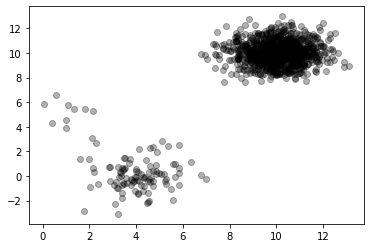

In [23]:
sizes = np.array([10,100,1000])
avgs_x = np.array([1,4,10])
avgs_y = np.array([5,0,10])
import time

seed = time.time()
data3 = np.zeros(1);

for a_x,a_y,s in zip(avgs_x,avgs_y,sizes):
    cx = []
    cy = []
    for  i in range(s):
        cx.append(random.gauss(a_x,1))
        cy.append(random.gauss(a_y,1))
    cx = np.array(cx)
    cy = np.array(cy)
    aux = np.vstack((cx,cy)).T
    
    if data3.shape[0] == 1:
        data3 = aux
    else:
        data3 = np.concatenate((data3,aux))
plt.plot(data3[:,0],data3[:,1],'ko',alpha=0.3)

### Aplicación del método K-Means sobre los datos de poblaciones

In [24]:
km.fit(data3)

Initialization complete
Iteration 0, inertia 5391.311744228603
Iteration 1, inertia 2399.6251446620404
Converged at iteration 1: strict convergence.


KMeans(n_clusters=2, n_init=1, verbose=1)

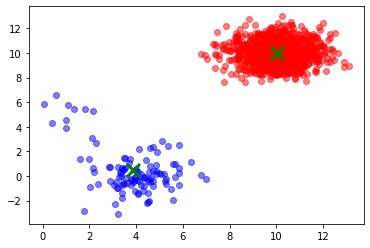

In [26]:
#Representamos los datos tras aplicar K-means
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',s=169,linewidths=3,color='g',zorder=10)
plt.scatter(data3[km.labels_==0,0],data3[km.labels_==0,1],color='r',alpha=0.5)
plt.scatter(data3[km.labels_==1,0],data3[km.labels_==1,1],color='b',alpha=0.5)
plt.scatter(data3[km.labels_==2,0],data3[km.labels_==2,1],color='k',alpha=0.5)
plt.show()

## Apartado 2

<p>La principal desventaja del método K-means es que que necesita que el usuario defina el número de clústeres.
Otras desventajas son:</p>
<p>&nbsp; &nbsp; 1. K-means solo trata datos numéricos.</p>
<p>&nbsp; &nbsp; 2. k-means asume que estamos lidiando con cluster esféricos y que que cado grupo tiene aproximadamente el mismo número de observaciones. De hecho, k-means tiene problemas clusterizando cluster de distinto tamaño y densidad.</p>
<p>&nbsp; &nbsp; 3.Tiene problemas de escalado con el número de dimensiones, la 'distance-based' converge a un valor constante para las muestras.</p>


## Apartado 3

### Para el juego de datos1

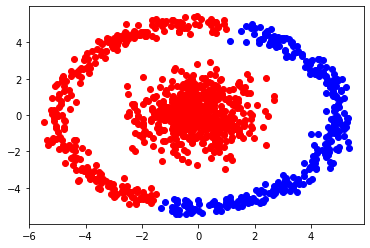

In [37]:
from sklearn.cluster import AgglomerativeClustering
single_link = AgglomerativeClustering(linkage='ward',n_clusters=2)
h_clusters = single_link.fit(data1)
plt.scatter(data1[h_clusters.labels_==0,0],data1[h_clusters.labels_==0,1],color='blue')
plt.scatter(data1[h_clusters.labels_==1,0],data1[h_clusters.labels_==1,1],color='red')

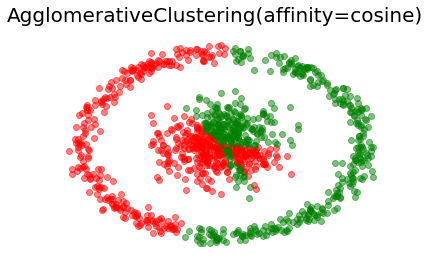

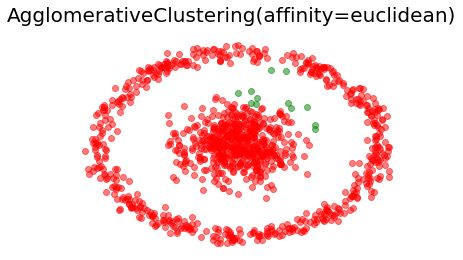

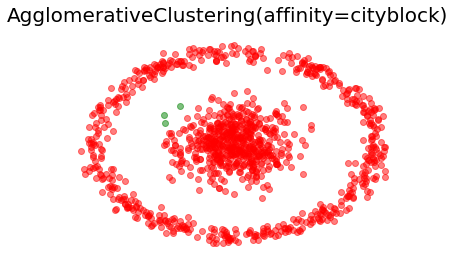

In [58]:
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(data1, n_neighbors=30, include_self=False)


for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(n_clusters=2,
                                    linkage="complete", affinity=metric,connectivity=connectivity)
    model.fit(data1)
    plt.figure()
    
    for l, c in zip(np.arange(model.n_clusters), 'rg'):
        plt.scatter(data1[model.labels_ == l,0],data1[model.labels_ == l,1], c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)

### Para el juego de datos 2

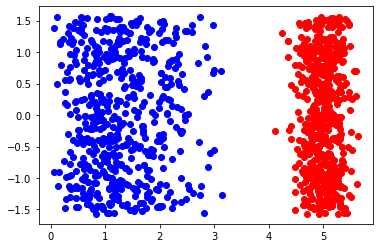

In [44]:
from sklearn.cluster import AgglomerativeClustering
single_link = AgglomerativeClustering(linkage='ward',n_clusters=2)
h_clusters = single_link.fit(data2)
plt.scatter(data2[h_clusters.labels_==0,0],data2[h_clusters.labels_==0,1],color='blue')
plt.scatter(data2[h_clusters.labels_==1,0],data2[h_clusters.labels_==1,1],color='red')

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:501: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:501: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:501: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


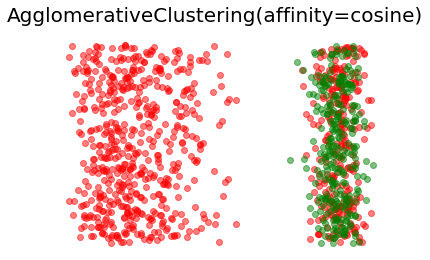

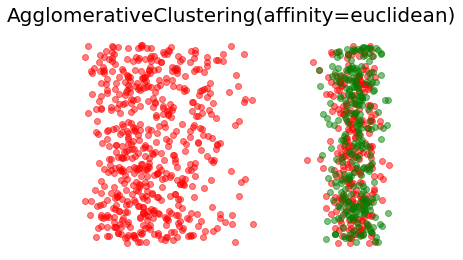

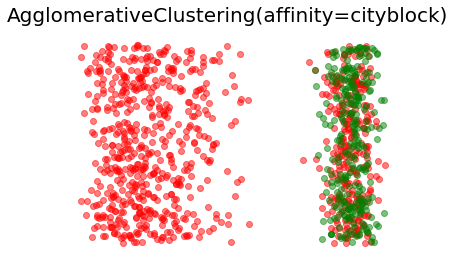

In [60]:
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(data2, n_neighbors=30, include_self=False)


for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(n_clusters=2,
                                    linkage="complete", affinity=metric,connectivity=connectivity)
    model.fit(data1)
    plt.figure()
    
    for l, c in zip(np.arange(model.n_clusters), 'rg'):
        plt.scatter(data2[model.labels_ == l,0],data2[model.labels_ == l,1], c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)

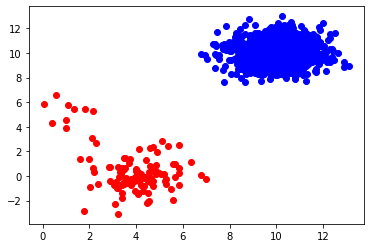

In [45]:
from sklearn.cluster import AgglomerativeClustering
single_link = AgglomerativeClustering(linkage='ward',n_clusters=2)
h_clusters = single_link.fit(data3)
plt.scatter(data3[h_clusters.labels_==0,0],data3[h_clusters.labels_==0,1],color='blue')
plt.scatter(data3[h_clusters.labels_==1,0],data3[h_clusters.labels_==1,1],color='red')

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:501: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:501: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:501: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


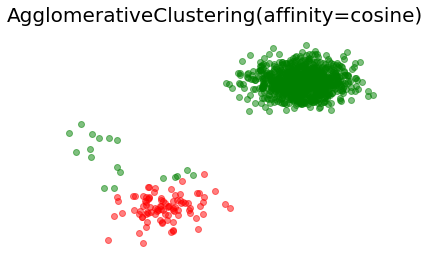

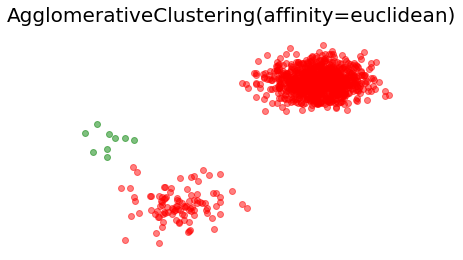

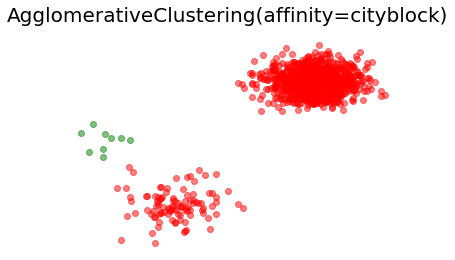

In [62]:
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(data3, n_neighbors=30, include_self=False)


for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(n_clusters=2,
                                    linkage="complete", affinity=metric,connectivity=connectivity)
    model.fit(data3)
    plt.figure()
    
    for l, c in zip(np.arange(model.n_clusters), 'rg'):
        plt.scatter(data3[model.labels_ == l,0],data3[model.labels_ == l,1], c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)

## Apartado 4

In [46]:
from sklearn import mixture
import itertools
from scipy import linalg
import matplotlib as mpl

### Para ej juego de dato1

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Wi

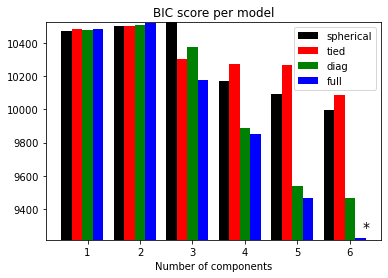

In [47]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(data1)
        bic.append(gmm.bic(data1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
bic = np.array(bic)
color_iter = itertools.cycle(['k', 'r', 'g', 'b', 'c', 'm', 'y'])
clf = best_gmm
bars = []

# Plot the BIC scores

for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)

### Para el juego de data2

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Wi

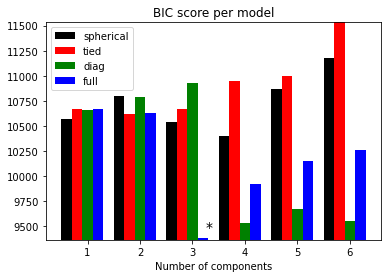

In [48]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(data1)
        bic.append(gmm.bic(data2))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
bic = np.array(bic)
color_iter = itertools.cycle(['k', 'r', 'g', 'b', 'c', 'm', 'y'])
clf = best_gmm
bars = []

# Plot the BIC scores

for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)

### Para el juego data3

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Wi

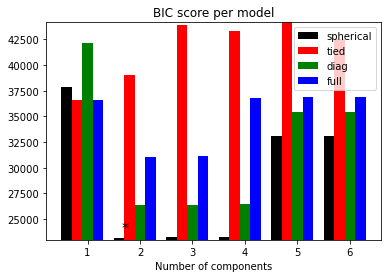

In [49]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(data3)
        bic.append(gmm.bic(data1))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
bic = np.array(bic)
color_iter = itertools.cycle(['k', 'r', 'g', 'b', 'c', 'm', 'y'])
clf = best_gmm
bars = []

# Plot the BIC scores

for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
plt.xlabel('Number of components')
plt.legend([b[0] for b in bars], cv_types)

## Apartado 5

### Para el juego de datos data1

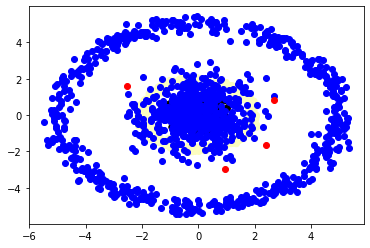

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

stscaler = StandardScaler().fit(data1)
data = stscaler.transform(data1)
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(data)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True
x1 = data1[:,0]
y1 = data1[:,1]
plt.plot(x1[core_samples==True],y1[core_samples==True],'bo')
plt.plot(x1[core_samples==False],y1[core_samples==False],'ro')
plt.scatter(data[:, 0], data[:,1], c = labels, cmap= "magma")
plt.show()

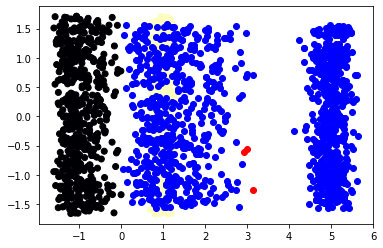

In [55]:
stscaler = StandardScaler().fit(data2)
data = stscaler.transform(data2)
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(data)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True
x1 = data2[:,0]
y1 = data2[:,1]
plt.plot(x1[core_samples==True],y1[core_samples==True],'bo')
plt.plot(x1[core_samples==False],y1[core_samples==False],'ro')
plt.scatter(data[:, 0], data[:,1], c = labels, cmap= "magma")
plt.show()

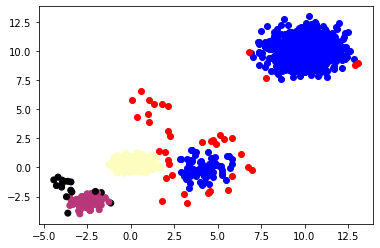

In [56]:
stscaler = StandardScaler().fit(data3)
data = stscaler.transform(data3)
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(data)
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True
x1 = data3[:,0]
y1 = data3[:,1]
plt.plot(x1[core_samples==True],y1[core_samples==True],'bo')
plt.plot(x1[core_samples==False],y1[core_samples==False],'ro')
plt.scatter(data[:, 0], data[:,1], c = labels, cmap= "magma")
plt.show()